# TEST 6 - Baraffe15 He abundance

This notebook is only for studying the effects of Z and alpha

I computed again the models but using Baraffe's helium abundance for the whole grid, Y=0.28. They don't mention anything about the metallicity
but I'm guessing they use a solar one.

It also looks like they have computed their tracks for only the range of log g between 3.5 and 5.0

- \[Fe/H\] = -0.5, 0, 0.3
- $\alpha_{MLT}$ = 1.6, 1.82
- masses = (0.1, 0.6) in steps of 0.05

In [1]:
import mesa_reader as mr
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D  
from matplotlib.patches import Patch

In [2]:
%matplotlib ipympl

In [3]:
df = pd.read_csv('Baraffe2015-tracks-clean.txt', delim_whitespace=True, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.01,5.695210,2388.0,-2.469,3.372,0.341,0.0000,5.417,0.2639,0.0000,0.000,0.45350,0.0000
1,0.01,5.702261,2387.0,-2.474,3.377,0.339,0.0000,5.418,0.2696,0.0000,0.000,0.45380,0.0000
2,0.01,5.709309,2387.0,-2.479,3.381,0.337,0.0000,5.420,0.2753,0.0000,0.000,0.45420,0.0000
3,0.01,5.723397,2386.0,-2.488,3.391,0.334,0.0000,5.423,0.2867,0.0000,0.000,0.45500,0.0000
4,0.01,5.730433,2386.0,-2.493,3.395,0.332,0.0000,5.424,0.2925,0.0000,0.000,0.45530,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11716,1.40,9.425035,6207.0,0.729,3.980,2.004,-0.0278,7.395,2.3306,1.3995,1.733,0.01432,0.1894
11717,1.40,9.425153,6209.0,0.730,3.980,2.005,-0.0278,7.396,2.3325,1.3995,1.740,0.01386,0.1893
11718,1.40,9.425268,6211.0,0.731,3.979,2.005,-0.0278,7.396,2.3344,1.3995,1.739,0.01385,0.1891
11719,1.40,9.425381,6213.0,0.732,3.979,2.006,-0.0278,7.397,2.3372,1.3995,1.738,0.01384,0.1889


In [4]:
df.columns = ['mass', 'age', 'Teff', 'logL', 'logg', 'radius'] + ['other'] * (df.shape[1] - 6)

# Necessary columns
df_cleaned = df[['mass', 'age', 'Teff', 'logL', 'logg', 'radius']]
df_cleaned

,mass,age,Teff,logL,logg,radius
0,0.01,5.695210,2388.0,-2.469,3.372,0.341
1,0.01,5.702261,2387.0,-2.474,3.377,0.339
2,0.01,5.709309,2387.0,-2.479,3.381,0.337
3,0.01,5.723397,2386.0,-2.488,3.391,0.334
4,0.01,5.730433,2386.0,-2.493,3.395,0.332
...,...,...,...,...,...,...
11716,1.40,9.425035,6207.0,0.729,3.980,2.004
11717,1.40,9.425153,6209.0,0.730,3.980,2.005
11718,1.40,9.425268,6211.0,0.731,3.979,2.005
11719,1.40,9.425381,6213.0,0.732,3.979,2.006


In [5]:
# Dictionaries to store values according to mass
mass_data = {}

# Group them by mass
grouped = df_cleaned.groupby('mass')

for mass, group in grouped:
    mass_data[mass] = {
        'ages': group['age'].tolist(),
        'Teff': group['Teff'].tolist(),
        'logL': group['logL'].tolist(),
        'logg': group['logg'].tolist(),
        'radius': group['radius'].tolist()
    }

# Now mass_data has the values grouped by mass

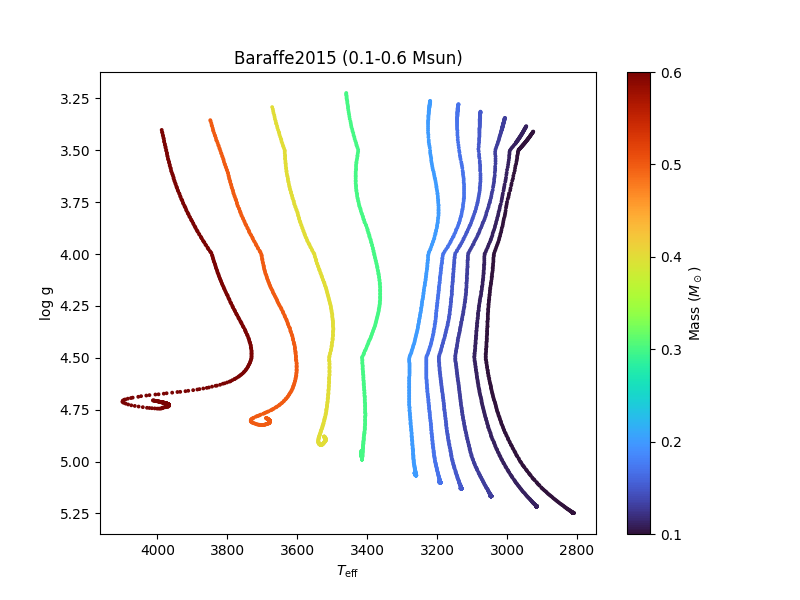

In [6]:
# Filter masses between 0.1 and 0.6 solar masses
filtered_df = df_cleaned[(df_cleaned['mass'] >= 0.1) & (df_cleaned['mass'] <= 0.6)]

fig, ax = plt.subplots(figsize=(8, 6)) 

# Colours list based on mass values
norm = plt.Normalize(filtered_df['mass'].min(), filtered_df['mass'].max())
cmap = plt.cm.turbo

# logg vs Teff
sc = ax.scatter(filtered_df['Teff'], filtered_df['logg'], c=filtered_df['mass'], cmap=cmap, norm=norm, alpha=1, s=3)

ax.invert_xaxis()
ax.invert_yaxis()

# Colour bar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label(r'Mass ($M_\odot$)')

ax.set_xlabel(r'$T_\text{eff}$')
ax.set_ylabel('log g')
ax.set_title('Baraffe2015 (0.1-0.6 Msun)')

plt.show()


In [7]:
# 0.10, 0.30, 0.40 and 0.60 Msun tracks
# we will plot them with our models

mass_010_BF15 = filtered_df[filtered_df['mass'] == 0.10]
mass_030_BF15 = filtered_df[filtered_df['mass'] == 0.30]
mass_040_BF15 = filtered_df[filtered_df['mass'] == 0.40]
mass_060_BF15 = filtered_df[filtered_df['mass'] == 0.60]

In [8]:
# Define the parameters
masses = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
alphas = [1.0, 1.6, 1.82]
metallicities = [0.0045, 0.0142, 0.028]


# Base path template
base_path = 'test2_grid_deuterium_tau100/results/mass{mass}_alpha{alpha}_z{z}/history.data'

# Create a list to store the MesaData instances and their associated alpha values
mesa_data_list = []

# Loop over the parameters to create the paths and MesaData instances
for mass in masses:
    for alpha in alphas:
        for z in metallicities:
            # Format the path
            path = base_path.format(mass=mass, alpha=alpha, z=z)
            
            try:
                # Create the MesaData instance
                mesa_data_instance = mr.MesaData(path)
                
                # Append the MesaData instance to the list
                mesa_data_list.append((mesa_data_instance, mass, z, alpha))
                
            except FileNotFoundError:
                print(f"FileNotFoundError: history.data not found for mass={mass}, alpha={alpha}, z={z}.")


## 0.10$M_\odot$

In [9]:
for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.82:   
        mass010_z0045_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.82:
        mass010_z0142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.028 and mesa_data[3] == 1.82:
        mass010_z028_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.6:   
        mass010_z0045_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.6:
        mass010_z0142_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.028 and mesa_data[3] == 1.6:
        mass010_z028_alpha16 = mesa_data[0]
        break
        
for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.00142 and mesa_data[3] == 1.6:
        mass010_z00142_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.0:   
        mass010_z0045_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.0:
        mass010_z0142_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.00142 and mesa_data[3] == 1.0:
        mass010_z00142_alpha1 = mesa_data[0]
        break


## 0.30$M_\odot$

In [10]:
for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.30 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.82:   
        mass030_z0045_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.30 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.82:
        mass030_z0142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.30 and mesa_data[2] == 0.028 and mesa_data[3] == 1.82:
        mass030_z028_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.30 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.6:   
        mass030_z0045_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.30 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.6:
        mass030_z0142_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.30 and mesa_data[2] == 0.028 and mesa_data[3] == 1.6:
        mass030_z028_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.30 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.0:   
        mass030_z0045_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.30 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.0:
        mass030_z0142_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.30 and mesa_data[2] == 0.00142 and mesa_data[3] == 1.0:
        mass030_z00142_alpha1 = mesa_data[0]
        break

## 0.35$M_\odot$

In [11]:
# Iterate over mesa_data_list to find the specific model

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.82:   
        mass035_z0045_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.82:
        mass035_z0142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.028 and mesa_data[3] == 1.82:
        mass035_z028_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.6:   
        mass035_z0045_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.6:
        mass035_z0142_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.028 and mesa_data[3] == 1.6:
        mass035_z028_alpha16 = mesa_data[0]
        break
        
for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.0:   
        mass035_z0045_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.0:
        mass035_z0142_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.00142 and mesa_data[3] == 1.0:
        mass035_z00142_alpha1 = mesa_data[0]
        break

## 0.40$M_\odot$

In [12]:
for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.40 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.82:   
        mass040_z0045_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.40 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.82:
        mass040_z0142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.40 and mesa_data[2] == 0.028 and mesa_data[3] == 1.82:
        mass040_z028_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.40 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.6:   
        mass040_z0045_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.40 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.6:
        mass040_z0142_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.40 and mesa_data[2] == 0.028 and mesa_data[3] == 1.6:
        mass040_z028_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.40 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.0:   
        mass040_z0045_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.40 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.0:
        mass040_z0142_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.40 and mesa_data[2] == 0.00142 and mesa_data[3] == 1.0:
        mass040_z00142_alpha1 = mesa_data[0]
        break

## 0.60$M_\odot$

In [13]:
# Iterate over mesa_data_list to find the specific model

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.82:  
        mass060_z0045_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.82:
        mass060_z0142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.028 and mesa_data[3] == 1.82:
        mass060_z028_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.6:  
        mass060_z0045_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.6:
        mass060_z0142_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.028 and mesa_data[3] == 1.6:
        mass060_z028_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.0:  
        mass060_z0045_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.0:
        mass060_z0142_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.00142 and mesa_data[3] == 1.0:
        mass060_z00142_alpha1 = mesa_data[0]
        break

# Metallicity

We explore the effect of the different metallicities for 3 masses and fixed $\alpha_\text{MLT}$ = 1.6, since this value is the one Baraffe uses.

## HR diagram

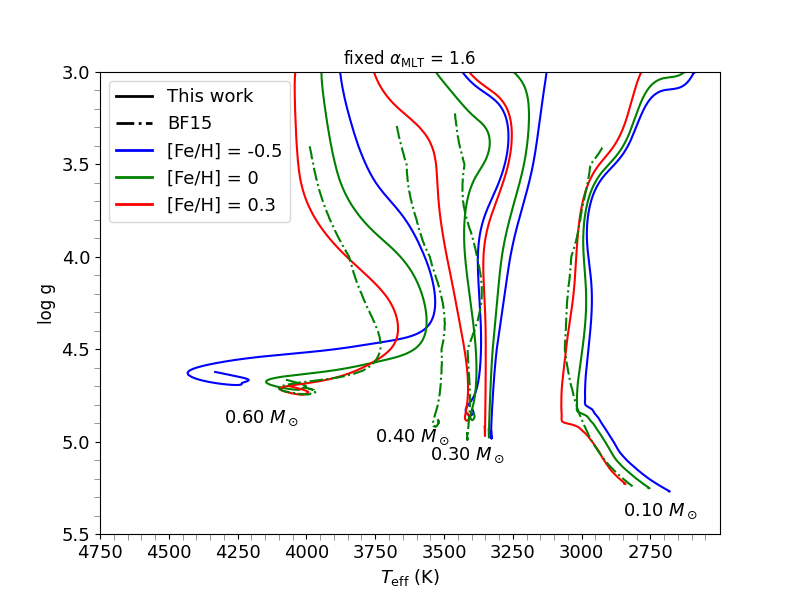

In [14]:
plt.figure(figsize=(8, 6))

plt.annotate(r'0.10 $M_\odot$', (2850, 5.4), fontsize=13)

plt.plot(mass010_z0045_alpha16.Teff, mass010_z0045_alpha16.log_g, color='blue', linestyle='-')
plt.plot(mass010_z0142_alpha16.Teff, mass010_z0142_alpha16.log_g, color='green', linestyle='-')
plt.plot(mass010_z028_alpha16.Teff, mass010_z028_alpha16.log_g, color='red', linestyle='-')

plt.plot(mass_010_BF15['Teff'], mass_010_BF15['logg'], color='green', ls='-.')

# plt.annotate(r'0.35 $M_\odot$', (3400, 5), fontsize=13)

plt.plot(mass030_z0045_alpha16.Teff, mass030_z0045_alpha16.log_g, color='blue', linestyle='-')
plt.plot(mass030_z0142_alpha16.Teff, mass030_z0142_alpha16.log_g, color='green', linestyle='-')
plt.plot(mass030_z028_alpha16.Teff, mass030_z028_alpha16.log_g, color='red', linestyle='-')

plt.plot(mass040_z0045_alpha16.Teff, mass040_z0045_alpha16.log_g, color='blue', linestyle='-')
plt.plot(mass040_z0142_alpha16.Teff, mass040_z0142_alpha16.log_g, color='green', linestyle='-')
plt.plot(mass040_z028_alpha16.Teff, mass040_z028_alpha16.log_g, color='red', linestyle='-')

plt.annotate(r'0.30 $M_\odot$', (3550, 5.1), fontsize=13)
plt.annotate(r'0.40 $M_\odot$', (3750, 5), fontsize=13)

plt.plot(mass_030_BF15['Teff'], mass_030_BF15['logg'], color='green', ls='-.')
plt.plot(mass_040_BF15['Teff'], mass_040_BF15['logg'], color='green', ls='-.')

plt.annotate(r'0.60 $M_\odot$', (4300, 4.9), fontsize=13)

plt.plot(mass060_z0045_alpha16.Teff, mass060_z0045_alpha16.log_g, color='blue', linestyle='-')
plt.plot(mass060_z0142_alpha16.Teff, mass060_z0142_alpha16.log_g, color='green', linestyle='-')
plt.plot(mass060_z028_alpha16.Teff, mass060_z028_alpha16.log_g, color='red', linestyle='-')

plt.plot(mass_060_BF15['Teff'], mass_060_BF15['logg'], color='green', ls='-.')

# Set axis labels
plt.xlabel(r'$T_{\text{eff}}$ (K)', fontsize=13)
plt.ylabel('log g', fontsize=12)

plt.title(r'fixed $\alpha_\text{MLT}$ = 1.6')

# Retrieve current axis
ax = plt.gca()

# Set major and minor ticks
xmajor_ticks = np.arange(4750, 2500, -250)
xminor_ticks = np.arange(4750, 2500, -50)
ymajor_ticks = np.arange(5.5, 2, -0.5)
yminor_ticks = np.arange(5.5, 2, -0.1)

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

# Customize tick appearance
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', length=4, color='gray')

# Invert axes
ax.invert_xaxis()
ax.invert_yaxis()

plt.ylim(5.5,3)

# Enable grid for minor ticks
#ax.grid(which='both', linestyle='--', linewidth=0.5)
#ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)

# Create a custom legend
legend_elements = [
    Line2D([0], [0], color='black', lw=2, linestyle='-', label=r'This work'),
    Line2D([0], [0], color='black', lw=2, linestyle='-.', label=r'BF15'),
    Line2D([0], [0], color='blue', lw=2, label=r'[Fe/H] = -0.5'),
    Line2D([0], [0], color='green', lw=2, label=r'[Fe/H] = 0'),
    Line2D([0], [0], color='red', lw=2, label=r'[Fe/H] = 0.3'), 
]
plt.legend(handles=legend_elements, fontsize=13, loc='upper left')
# Save figure

# Save figure
plt.savefig('metallicity-comparison-baraffe15-with-myYabundance.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


# ML parameter
We fix the metallicity to the solar one 0.0142 and compare the alphas

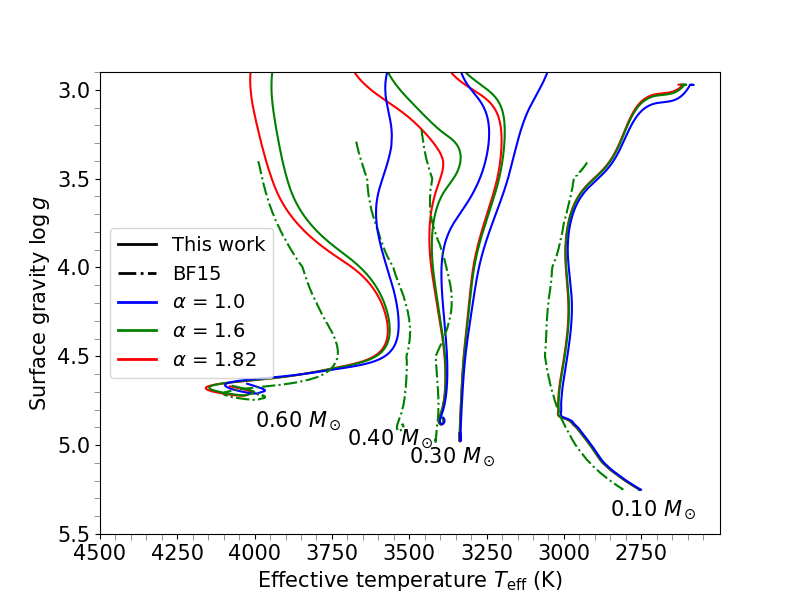

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

# Annotations
plt.annotate(r'0.10 $M_\odot$', (2850, 5.4), fontsize=15)

# Plots for 0.10 M_sun
plt.plot(mass010_z0142_alpha182.Teff, mass010_z0142_alpha182.log_g, color='red', linestyle='-')
plt.plot(mass010_z0142_alpha16.Teff, mass010_z0142_alpha16.log_g, color='green', linestyle='-')
plt.plot(mass010_z0142_alpha1.Teff, mass010_z0142_alpha1.log_g, color='blue', linestyle='-')

plt.plot(mass_010_BF15['Teff'], mass_010_BF15['logg'], color='green', ls='-.', label='BF15')

# plt.annotate(r'0.35 $M_\odot$', (3400, 5), fontsize=15)

# Plots for 0.35 M_sun
plt.plot(mass030_z0142_alpha182.Teff, mass030_z0142_alpha182.log_g, color='red', linestyle='-')
plt.plot(mass030_z0142_alpha16.Teff, mass030_z0142_alpha16.log_g, color='green', linestyle='-')
plt.plot(mass030_z0142_alpha1.Teff, mass030_z0142_alpha1.log_g, color='blue', linestyle='-')

plt.plot(mass040_z0142_alpha182.Teff, mass040_z0142_alpha182.log_g, color='red', linestyle='-')
plt.plot(mass040_z0142_alpha16.Teff, mass040_z0142_alpha16.log_g, color='green', linestyle='-')
plt.plot(mass040_z0142_alpha1.Teff, mass040_z0142_alpha1.log_g, color='blue', linestyle='-')

plt.annotate(r'0.30 $M_\odot$', (3500, 5.1), fontsize=15)
plt.annotate(r'0.40 $M_\odot$', (3700, 5), fontsize=15)

plt.plot(mass_030_BF15['Teff'], mass_030_BF15['logg'], color='green', ls='-.')
plt.plot(mass_040_BF15['Teff'], mass_040_BF15['logg'], color='green', ls='-.')

plt.annotate(r'0.60 $M_\odot$', (4000, 4.9), fontsize=15)

# Plots for 0.60 M_sun
plt.plot(mass060_z0142_alpha182.Teff, mass060_z0142_alpha182.log_g, color='red', linestyle='-')
plt.plot(mass060_z0142_alpha16.Teff, mass060_z0142_alpha16.log_g, color='green', linestyle='-')
plt.plot(mass060_z0142_alpha1.Teff, mass060_z0142_alpha1.log_g, color='blue', linestyle='-')

plt.plot(mass_060_BF15['Teff'], mass_060_BF15['logg'], color='green', ls='-.')

# Set axis labels
plt.xlabel(r'Effective temperature $T_{\text{eff}}$ (K)', fontsize=15)
plt.ylabel(r'Surface gravity $\log g$', fontsize=15)

plt.title('')

# Retrieve current axis
ax = plt.gca()

# Set major and minor ticks
xmajor_ticks = np.arange(4500, 2500, -250)
xminor_ticks = np.arange(4500, 2500, -50)
ymajor_ticks = np.arange(5.5, 2, -0.5)
yminor_ticks = np.arange(5.5, 2, -0.1)

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

# Customize tick appearance
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', length=4, color='gray')

# Invert axes
ax.invert_xaxis()
ax.invert_yaxis()

plt.ylim(5.5,2.9)

# Enable grid for minor ticks
#ax.grid(which='both', linestyle='--', linewidth=0.5)
#ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)

# Create a custom legend
legend_elements = [
    Line2D([0], [0], color='black', lw=2, linestyle='-', label=r'This work'),
    Line2D([0], [0], color='black', lw=2, linestyle='-.', label=r'BF15'),
    Line2D([0], [0], color='blue', lw=2, label=r'$\alpha$ = 1.0'),
    Line2D([0], [0], color='green', lw=2, label=r'$\alpha$ = 1.6'),
    Line2D([0], [0], color='red', lw=2, label=r'$\alpha$ = 1.82'),
]
plt.legend(handles=legend_elements, fontsize=14, loc='best')

# Save figure
plt.savefig('alpha-comparison-baraffe15-with-myYabundance.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


# Teff dependence with $M/M_\odot$ for different $\alpha_\text{MLT}$ and Z

We do it for the very last moment in the evolution, at the current age of the Universe.

We could do it for another moment in the MS, probably obtaining different results.

In [16]:
# Create a list to store the MesaData instances and their associated parameters
mesa_data_list = []

# Loop over the parameters to create the paths and MesaData instances
for mass in masses:
    for alpha in alphas:
        for z in metallicities:
            # Format the path
            path = base_path.format(mass=mass, alpha=alpha, z=z)
            
            try:
                # Create the MesaData instance
                mesa_data_instance = mr.MesaData(path)
                
                # Append the MesaData instance and parameters to the list
                mesa_data_list.append((mesa_data_instance, mass, alpha, z))
                
            except FileNotFoundError:
                print(f"FileNotFoundError: history.data not found for mass={mass}, alpha={alpha}, z={z}.")

# Create dictionaries to store the last temperature values for each combination of alpha and metallicity
last_teff_values = {(alpha, z): [] for alpha in alphas for z in metallicities}

# Iterate over MesaData instances in mesa_data_list
for mesa_data, mass, alpha, z in mesa_data_list:
    # Access the last Teff values
    last_teff = mesa_data.Teff[-1]
    
    # Append the last Teff values to the corresponding lists in the dictionaries
    last_teff_values[(alpha, z)].append(last_teff)

# Print the results for Teff
print("Last Teff values:")
for (alpha, z), teff_list in last_teff_values.items():
    print(f"Alpha: {alpha}, Z: {z}")
    print(f"Last Teff values: {teff_list}")
    print()


Last Teff values:
Alpha: 1.0, Z: 0.0045
Last Teff values: [2680.357423157591, 3119.686255635632, 3262.1575891637985, 3303.8861591584323, 3326.1020432333007, 3349.0607376327325, 3393.9352780288937, 3505.3797627708886, 3757.918286146263, 3993.825986490636, 4264.241013486129]

Alpha: 1.0, Z: 0.0142
Last Teff values: [2753.6423442363503, 3177.0081251381084, 3278.9846144927365, 3313.716853974903, 3335.242943625019, 3355.077039979299, 3389.211049054411, 3458.199038199257, 3608.335307861294, 3839.0086880197796, 4024.2114230803504]

Alpha: 1.0, Z: 0.028
Last Teff values: [2840.6406192305985, 3218.10545576355, 3298.4175198589514, 3327.7590661748573, 3350.0202962129624, 3372.2820017216914, 3409.8514498243444, 3482.8339575598125, 3639.7348998456946, 3849.526112422337, 4013.024669634257]

Alpha: 1.6, Z: 0.0045
Last Teff values: [2683.0033293349957, 3123.756494167043, 3266.677648764422, 3306.6404877813297, 3328.5192981660075, 3351.479445864471, 3397.428621312762, 3514.9790302565384, 3782.6602385807

In [17]:
# Acess to the lists directly

last_teff_alpha16_z00045 = last_teff_values[(1.6, 0.0045)]
last_teff_alpha16_z00142 = last_teff_values[(1.6, 0.0142)]
last_teff_alpha16_z0028 = last_teff_values[(1.6, 0.028)]
last_teff_alpha182_z00045 = last_teff_values[(1.82, 0.0045)]
last_teff_alpha182_z00142 = last_teff_values[(1.82, 0.0142)]
last_teff_alpha182_z0028 = last_teff_values[(1.82, 0.028)]

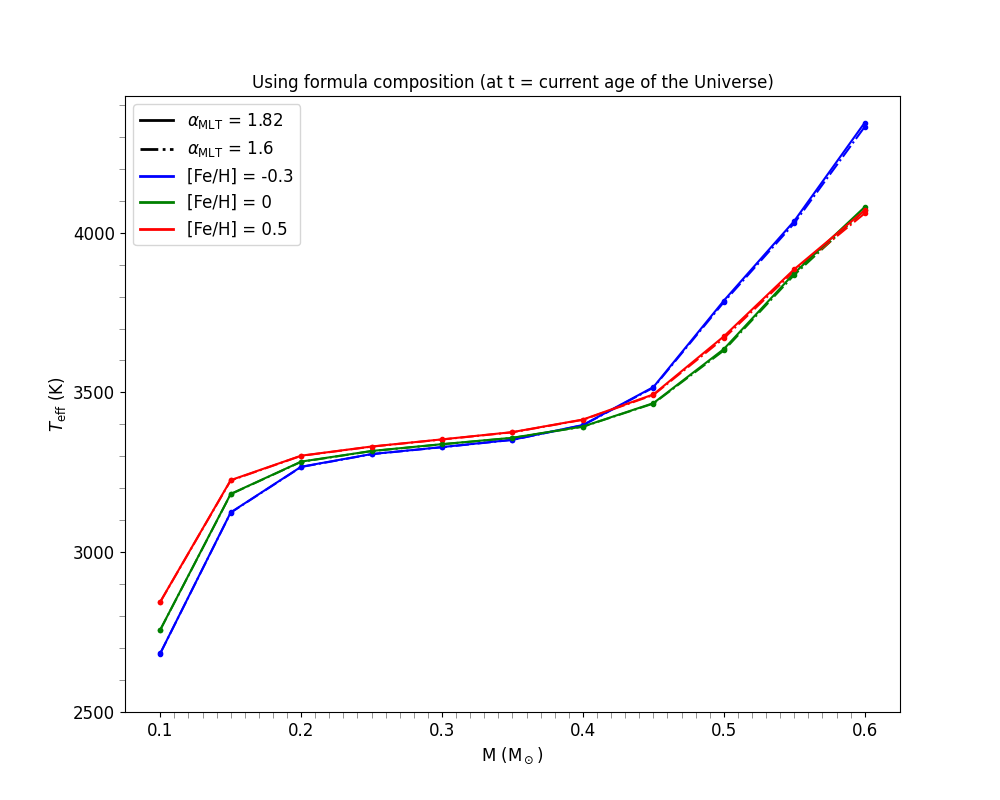

In [18]:
plt.figure(figsize=(10, 8))

plt.plot(masses, last_teff_alpha16_z00045, color='blue', marker='.', linestyle='-.')
plt.plot(masses, last_teff_alpha16_z00142, color='green', marker='.', linestyle='-.')
plt.plot(masses, last_teff_alpha16_z0028, color='red', marker='.', linestyle='-.')

plt.plot(masses, last_teff_alpha182_z00045, color='blue', marker='.', linestyle='-')
plt.plot(masses, last_teff_alpha182_z00142, color='green', marker='.', linestyle='-')
plt.plot(masses, last_teff_alpha182_z0028, color='red', marker='.', linestyle='-')

# Set axis labels
plt.xlabel(r'M (M$_\odot$)', fontsize=12)
plt.ylabel(r'$T_{\text{eff}}$ (K)', fontsize=12)

plt.title('Using formula composition (at t = current age of the Universe)')

# Retrieve current axis
ax = plt.gca()

# Set major and minor ticks
xmajor_ticks = np.arange(0.1, 0.65, 0.1)
xminor_ticks = np.arange(0.1, 0.6, 0.01)
ymajor_ticks = np.arange(2500, 4500, 500)
yminor_ticks = np.arange(2500, 4500, 100)

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

# Customize tick appearance
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', length=4, color='gray')

plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 

# Create a custom legend
legend_elements = [
    Line2D([0], [0], color='black', lw=2, linestyle='-', label=r'$\alpha_\text{MLT}$ = 1.82'),
    Line2D([0], [0], color='black', lw=2, linestyle='-.', label=r'$\alpha_\text{MLT}$ = 1.6'),
    # Line2D([0], [0], color='black', lw=2, linestyle=':', label=r'$\alpha_\text{MLT}$ = 1.0'),
    Line2D([0], [0], color='blue', lw=2, label=r'[Fe/H] = -0.3'),
    Line2D([0], [0], color='green', lw=2, label=r'[Fe/H] = 0'),
    Line2D([0], [0], color='red', lw=2, label=r'[Fe/H] = 0.5')
]
plt.legend(handles=legend_elements, fontsize=12, loc='upper left')

# Save figure
#plt.savefig('alpha-metallicity-influence-baraffe15-abundance.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


## Teff dependence with $M/M_\odot$ at target age
We are going to compare Baraffe's isochrone at t = 5 Gyrs with ours.

In [19]:
# Reading Baraffe's 2015 isochrone

df_iso_5Gyrs = pd.read_csv('Baraffe2015_iso.txt', delim_whitespace=True, header=None, skiprows=21, comment='!')

# we will store only the necessary columns

df_iso_5Gyrs.columns = ['mass', 'Teff'] + ['other'] * (df_iso_5Gyrs.shape[1] - 2)
df_iso_5Gyrs_cleaned = df_iso_5Gyrs[['mass', 'Teff']]

In [20]:
from scipy.interpolate import interp1d

# Now I compute my own isochrones
# Create a list to store the MesaData instances and their associated parameters
mesa_data_list = []

# Loop over the parameters to create the paths and MesaData instances
for mass in masses:
    for alpha in alphas:
        for z in metallicities:
            # Format the path
            path = base_path.format(mass=mass, alpha=alpha, z=z)
            
            try:
                # Create the MesaData instance
                mesa_data_instance = mr.MesaData(path)
                
                # Append the MesaData instance and parameters to the list
                mesa_data_list.append((mesa_data_instance, mass, alpha, z))
                
            except FileNotFoundError:
                print(f"FileNotFoundError: history.data not found for mass={mass}, alpha={alpha}, z={z}.")

# Define the target age (in years)
target_age = 5 * 10**9

# Create dictionaries to store the Teff values at the target age for each combination of alpha and metallicity
teff_at_target_age = {(alpha, z): [] for alpha in alphas for z in metallicities}

# Iterate over MesaData instances in mesa_data_list
for mesa_data, mass, alpha, z in mesa_data_list:
    # Extract the age and Teff arrays
    age = np.array(mesa_data.star_age)
    teff = np.array(mesa_data.Teff)

    # Check if the target age is within the age range of the data
    if target_age >= age[0] and target_age <= age[-1]:
        # Interpolate the Teff values at the target age
        teff_interp = interp1d(age, teff, kind='linear')
        
        teff_at_age = teff_interp(target_age)
        
        # Append the interpolated Teff values to the corresponding lists in the dictionaries
        teff_at_target_age[(alpha, z)].append(teff_at_age)
    else:
        print(f"Target age {target_age} years is out of range for mass={mass}, alpha={alpha}, z={z}.")

# Print the results for Teff at the target age
print("Teff values at target age:")
for (alpha, z), teff_list in teff_at_target_age.items():
    print(f"Alpha: {alpha}, Z: {z}")
    print(f"Teff values at {target_age} years: {teff_list}")
    print()


Teff values at target age:
Alpha: 1.0, Z: 0.0045
Teff values at 5000000000 years: [array(2677.7393385), array(3114.43953136), array(3259.91532895), array(3302.98056845), array(3325.53243151), array(3347.58219455), array(3390.24490373), array(3491.24720523), array(3720.8285052), array(3949.56009443), array(4186.20595534)]

Alpha: 1.0, Z: 0.0142
Teff values at 5000000000 years: [array(2750.94887415), array(3170.83390502), array(3277.26202396), array(3312.98416714), array(3334.61879604), array(3353.71174105), array(3386.32614512), array(3449.73043149), array(3583.16073933), array(3805.83828318), array(3979.93718077)]

Alpha: 1.0, Z: 0.028
Teff values at 5000000000 years: [array(2837.85997501), array(3214.27267418), array(3297.24568216), array(3327.08821755), array(3349.14001062), array(3370.76311649), array(3405.84672015), array(3472.84516313), array(3610.24298064), array(3817.57626374), array(3971.69905921)]

Alpha: 1.6, Z: 0.0045
Teff values at 5000000000 years: [array(2680.3673898), ar

In [21]:
# Acess to the lists directly

teff_at_target_age_alpha16_z00045 = teff_at_target_age[(1.6, 0.0045)]
teff_at_target_age_alpha16_z00142 = teff_at_target_age[(1.6, 0.0142)]
teff_at_target_age_alpha16_z0028 = teff_at_target_age[(1.6, 0.028)]
teff_at_target_age_alpha182_z00045 = teff_at_target_age[(1.82, 0.0045)]
teff_at_target_age_alpha182_z00142 = teff_at_target_age[(1.82, 0.0142)]
teff_at_target_age_alpha182_z0028 = teff_at_target_age[(1.82, 0.028)]

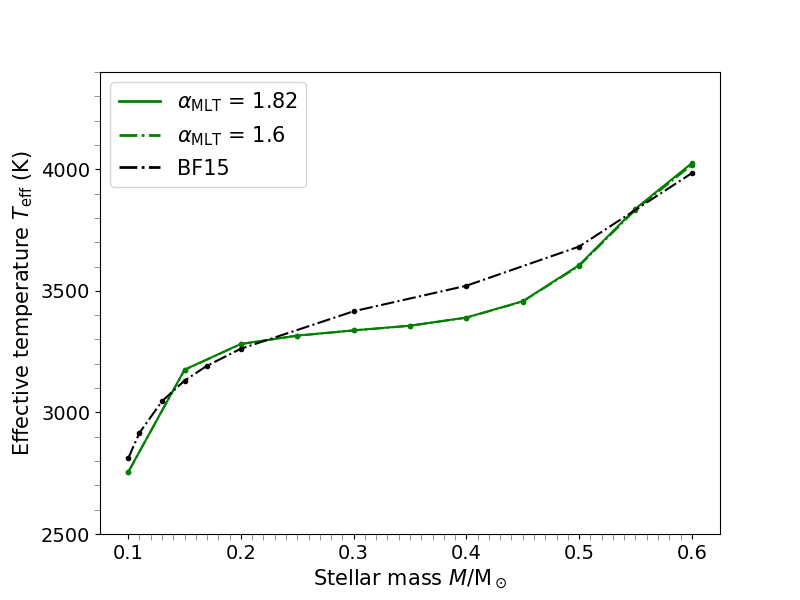

In [25]:
plt.figure(figsize=(8, 6))

# plt.plot(masses, teff_at_target_age_alpha16_z00045, color='blue', marker='.', linestyle='-.')
plt.plot(masses, teff_at_target_age_alpha16_z00142, color='green', marker='.', linestyle='-.')
# plt.plot(masses, teff_at_target_age_alpha16_z0028, color='red', marker='.', linestyle='-.')

# plt.plot(masses, teff_at_target_age_alpha182_z00045, color='blue', marker='.', linestyle='-')
plt.plot(masses, teff_at_target_age_alpha182_z00142, color='green', marker='.', linestyle='-')
# plt.plot(masses, teff_at_target_age_alpha182_z0028, color='red', marker='.', linestyle='-')

plt.plot(df_iso_5Gyrs_cleaned['mass'], df_iso_5Gyrs_cleaned['Teff'], color='black', marker='.', ls='-.')
# Set axis labels
plt.xlabel(r'Stellar mass $M/$M$_\odot$', fontsize=15)
plt.ylabel(r'Effective temperature $T_{\text{eff}}$ (K)', fontsize=15)

plt.title(r'', fontsize=12)

# Retrieve current axis
ax = plt.gca()

# Set major and minor ticks
xmajor_ticks = np.arange(0.1, 0.65, 0.1)
xminor_ticks = np.arange(0.1, 0.6, 0.01)
ymajor_ticks = np.arange(2500, 4500, 500)
yminor_ticks = np.arange(2500, 4500, 100)

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

# Customize tick appearance
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', length=4, color='gray')

plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 

# Create a custom legend
legend_elements = [
    Line2D([0], [0], color='green', lw=2, linestyle='-', label=r'$\alpha_\text{MLT}$ = 1.82'),
    Line2D([0], [0], color='green', lw=2, linestyle='-.', label=r'$\alpha_\text{MLT}$ = 1.6'),
    # Line2D([0], [0], color='green', lw=2, linestyle=':', label=r'$\alpha_\text{MLT}$ = 1.0'),
    # Line2D([0], [0], color='blue', lw=2, label=r'[Fe/H] = -0.3'),
    # Line2D([0], [0], color='green', lw=2, label=r'[Fe/H] = 0'),
    # Line2D([0], [0], color='red', lw=2, label=r'[Fe/H] = 0.5'),
    Line2D([0], [0], color='black', lw=2, ls='-.', label=r'BF15'),
]
plt.legend(handles=legend_elements, fontsize=15, loc='upper left')

# Save figure
plt.savefig('isochrone-Baraffe15-5000Myr-with-myYabundance.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()
